In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [64]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [65]:
#빈데이터 많은 Chol, BUN 제거
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2',
           'PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2',
           'PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]

In [66]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [67]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [68]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [69]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [70]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [71]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [72]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.107955,0.306818,23.787859,5.062500,7.715909,0.757955,5.856227,56.110795,34.115909,98.857955,...,0.636364,0.267045,0.227273,0.397727,0.448864,0.375000,1.142045,0.136364,0.460227,0.556818
std,11.451001,0.462489,4.980203,2.844858,4.133429,1.357495,1.420172,8.566716,7.746644,14.580897,...,1.027416,0.652244,0.618335,0.725688,0.930560,0.852727,0.690544,0.559220,0.840821,0.746159
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,20.833309,3.000000,4.975000,0.200000,4.857500,50.525000,28.975000,91.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,23.351473,5.000000,6.600000,0.300000,5.720000,55.950000,34.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.612500,62.025000,39.000000,102.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [73]:
psqi_df["SEX"].value_counts()

0.0    122
1.0     54
Name: SEX, dtype: int64

In [74]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,3.0
173,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


In [75]:
#x 배열 생성 (x=쓸 수 있는 모든 특징)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [76]:
len(X), len(Y)

(352, 352)

In [77]:
X.shape, Y.shape

((352, 48), (352, 1))

# 정규화

In [78]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [79]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [80]:
len(x_train), len(x_test)

(281, 71)

In [81]:
X.shape, Y.shape

((352, 48), (352, 1))

In [82]:
dim=X.shape[1]
dim

48

# MLP

In [83]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
71/71 - 1s - loss: 3447.4016 - mse: 3447.4016
Epoch 2/150
71/71 - 0s - loss: 2632.5325 - mse: 2632.5325
Epoch 3/150
71/71 - 0s - loss: 1429.1246 - mse: 1429.1246
Epoch 4/150
71/71 - 0s - loss: 520.0830 - mse: 520.0830
Epoch 5/150
71/71 - 0s - loss: 292.0315 - mse: 292.0315
Epoch 6/150
71/71 - 0s - loss: 242.5251 - mse: 242.5251
Epoch 7/150
71/71 - 0s - loss: 207.2390 - mse: 207.2390
Epoch 8/150
71/71 - 0s - loss: 177.7427 - mse: 177.7427
Epoch 9/150
71/71 - 0s - loss: 165.2109 - mse: 165.2109
Epoch 10/150
71/71 - 0s - loss: 149.7020 - mse: 149.7020
Epoch 11/150
71/71 - 0s - loss: 137.5908 - mse: 137.5908
Epoch 12/150
71/71 - 0s - loss: 124.9355 - mse: 124.9355
Epoch 13/150
71/71 - 0s - loss: 118.4650 - mse: 118.4650
Epoch 14/150
71/71 - 0s - loss: 109.9347 - mse: 109.9347
Epoch 15/150
71/71 - 0s - loss: 103.7826 - mse: 103.7826
Epoch 16/150
71/71 - 0s - loss: 99.8969 - mse: 99.8969
Epoch 17/150
71/71 - 0s - loss: 94.6168 - mse: 94.6168
Epoch 18/150
71/71 - 0s - loss: 90.106

[158.90367126464844, 158.90367126464844]

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

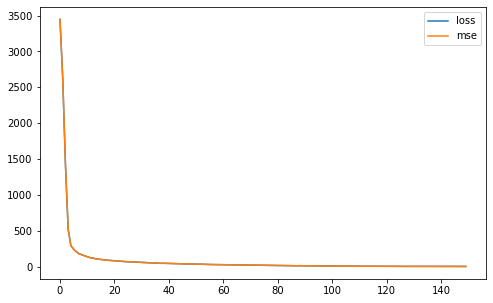

In [85]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [86]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [87]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [88]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.89 %
test set prediction accuracy: 56.34 %


In [89]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train set prediction accuracy(+-3): 98.22 % <br>
- test set prediction accuracy(+-3): 23.94 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 99.29 % <br>
- test set prediction accuracy(+-5): 30.99 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 100.00 % <br>
- test set prediction accuracy(+-10): 59.15 % <br>
<br>



In [90]:
#x 배열 생성 (시본으로 선별한 특징)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WBC_1','GLU0_1','ALT_1','TG_1','LDL_1',
            'Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WBC_2','GLU0_2','ALT_2','TG_2','LDL_2',
            'Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [91]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [92]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [93]:
len(x_train), len(x_test)

(281, 71)

In [94]:
X.shape, Y.shape

((352, 40), (352, 1))

In [95]:
dim=X.shape[1]
dim

40

# MLP

In [96]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
71/71 - 2s - loss: 3470.1448 - mse: 3470.1448
Epoch 2/150
71/71 - 0s - loss: 2628.6985 - mse: 2628.6985
Epoch 3/150
71/71 - 0s - loss: 1461.1482 - mse: 1461.1482
Epoch 4/150
71/71 - 0s - loss: 588.1369 - mse: 588.1369
Epoch 5/150
71/71 - 0s - loss: 351.0075 - mse: 351.0075
Epoch 6/150
71/71 - 0s - loss: 275.8846 - mse: 275.8846
Epoch 7/150
71/71 - 0s - loss: 230.2852 - mse: 230.2852
Epoch 8/150
71/71 - 0s - loss: 199.2744 - mse: 199.2744
Epoch 9/150
71/71 - 0s - loss: 174.7942 - mse: 174.7942
Epoch 10/150
71/71 - 0s - loss: 157.0444 - mse: 157.0444
Epoch 11/150
71/71 - 0s - loss: 142.6048 - mse: 142.6048
Epoch 12/150
71/71 - 0s - loss: 131.4588 - mse: 131.4588
Epoch 13/150
71/71 - 0s - loss: 122.1623 - mse: 122.1623
Epoch 14/150
71/71 - 0s - loss: 116.2028 - mse: 116.2028
Epoch 15/150
71/71 - 0s - loss: 107.9194 - mse: 107.9194
Epoch 16/150
71/71 - 0s - loss: 103.2931 - mse: 103.2931
Epoch 17/150
71/71 - 0s - loss: 98.9787 - mse: 98.9787
Epoch 18/150
71/71 - 0s - loss: 93.5

[188.99034118652344, 188.99034118652344]

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                1312      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

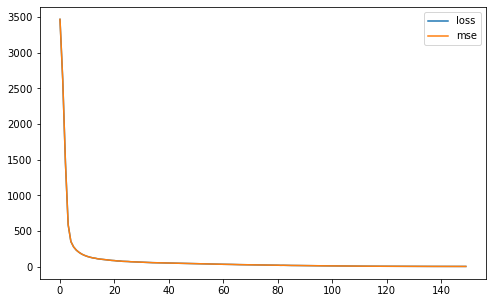

In [98]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [99]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [100]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [101]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.89 %
test set prediction accuracy: 56.34 %


In [102]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 93.24 % <br>
- test set prediction accuracy(+-3): 8.45 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 98.93 % <br>
- test set prediction accuracy(+-5): 23.94 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 100.00 % <br>
- test set prediction accuracy(+-10): 46.48 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 100.00 % <br>
- test set prediction accuracy(+-20): 88.73 % <br>


In [103]:
#x 배열 생성 (피검사 안하고 할 수 있는 수치)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [104]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [105]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [106]:
len(x_train), len(x_test)

(281, 71)

In [107]:
X.shape, Y.shape

((352, 37), (352, 1))

In [108]:
dim=X.shape[1]
dim

37

# MLP

In [109]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
71/71 - 1s - loss: 3461.4929 - mse: 3461.4929
Epoch 2/150
71/71 - 0s - loss: 2645.7688 - mse: 2645.7688
Epoch 3/150
71/71 - 0s - loss: 1487.6998 - mse: 1487.6998
Epoch 4/150
71/71 - 0s - loss: 595.7690 - mse: 595.7690
Epoch 5/150
71/71 - 0s - loss: 314.3575 - mse: 314.3575
Epoch 6/150
71/71 - 0s - loss: 249.4058 - mse: 249.4058
Epoch 7/150
71/71 - 0s - loss: 209.5905 - mse: 209.5905
Epoch 8/150
71/71 - 0s - loss: 187.2278 - mse: 187.2278
Epoch 9/150
71/71 - 0s - loss: 169.3305 - mse: 169.3305
Epoch 10/150
71/71 - 0s - loss: 152.9837 - mse: 152.9837
Epoch 11/150
71/71 - 0s - loss: 146.4853 - mse: 146.4853
Epoch 12/150
71/71 - 0s - loss: 137.8122 - mse: 137.8122
Epoch 13/150
71/71 - 0s - loss: 130.3012 - mse: 130.3012
Epoch 14/150
71/71 - 0s - loss: 123.0998 - mse: 123.0998
Epoch 15/150
71/71 - 0s - loss: 118.3086 - mse: 118.3086
Epoch 16/150
71/71 - 0s - loss: 114.1258 - mse: 114.1258
Epoch 17/150
71/71 - 0s - loss: 109.1127 - mse: 109.1127
Epoch 18/150
71/71 - 0s - loss: 10

[228.2456817626953, 228.2456817626953]

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                1216      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

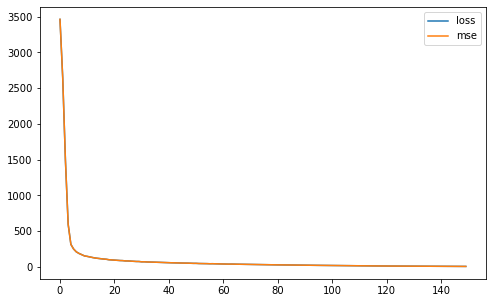

In [111]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [112]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [113]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [114]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.89 %
test set prediction accuracy: 56.34 %


In [115]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 86.12 % <br>
- test set prediction accuracy(+-3): 14.08 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 95.37 % <br>
- test set prediction accuracy(+-5): 23.94 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 99.64 % <br>
- test set prediction accuracy(+-10): 56.34 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 100.00 % <br>
- test set prediction accuracy(+-20): 83.10 % <br>


# 다쓴거
### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>

# 다안쓴거
### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>